# Retail Challenge

### **Contexto**

En un mundo donde las empresas dependen cada vez más de los datos para tomar decisiones estratégicas, la capacidad de segmentar clientes de manera efectiva se vuelve crucial. La segmentación de clientes permite a las empresas personalizar sus estrategias de marketing, mejorar la retención de clientes y maximizar el valor del cliente a lo largo del tiempo.

### **Objetivos**

Este proyecto tiene como objetivo desarrollar una aplicación web interactiva que permita a los científicos de datos realizar análisis de segmentación de clientes utilizando la metodología RFM (Recencia, Frecuencia, Valor Monetario). A través de procesos como lo son:

- Estadística Descriptiva
- Segmentación de Clientes
- Predicción de Abandono
- Valor del cliente a través del tiempo (CTLV)

La metodología de Segmentación de Clientes es una herramienta poderosa que se usa en diferentes industrias, desde la banca, turismo y la industria de consumo masivo. Cada vez las empresas quieren conocer mejor a sus clientes por medio de las diferentes fuentes de datos que
tienen disponibles con la información de estos clientes.


# Índice

- [Descripción de los datos](#Descripción-de-los-datos)

- [Analisis Estadistico Descriptivo](#Analisis-Estadistico-Descriptivo)

- [Visualizaciones](#Visualizaciones)

- [Reporte de resultados](#Reporte-de-resultados)


# Descripción de los datos

- INVOICE_NO : Número de serie de factura
- STOCK_CODE : Número serie del producto
- DESCRIPTION : Descripción del producto
- QUANTITY : Cantidad de compra del producto
- INVOICE_DATE : Fecha y hora de facturación
- UNIT_PRICE : Precio unitario
- CUSTOMER_ID : ID del cliente
- REGION : País de origen de la compra

# Analisis Estadistico Descriptivo

## Carga de dataset.
--- 
Utilizando la librería Pandas de Python cargamos el archivo csv para después obtener una muestra del dataset.
Con el método info() tenermos más información de las columnas, los valores y los tipos de datos que existen.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
from datetime import datetime
import plotly.graph_objects as go

In [3]:
df = pd.read_csv(r"Online_Retail.csv", encoding='unicode_escape')

In [4]:
df.sample(10)

INVOICE_NO STOCK_CODE                        DESCRIPTION  QUANTITY  \
151855     549570      22860       EASTER TIN CHICKS PINK DAISY         1   
23963      538296      22470              HEART OF WICKER LARGE         6   
74003      542398     90016B  GOLD/M.O.P PENDANT ORBIT NECKLACE         1   
530864     580884      23084                 RABBIT NIGHT LIGHT         1   
220532     556198      22523            CHILDS GARDEN FORK PINK         5   
233569     557476      23237  SET OF 4 KNICK KNACK TINS LEAVES          6   
10773      537237     85132B        CHARLIE AND LOLA TABLE TINS         1   
169841     551268      48116         DOORMAT MULTICOLOUR STRIPE         2   
461856     575952      48184              DOORMAT ENGLISH ROSE          1   
36005      539437      22932  BAKING MOULD TOFFEE CUP CHOCOLATE         1   

            INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
151855  10/04/2020 15:19        1.65      17550.0  United Kingdom  
23963   10/12/2019 13:06        2.95      13148.0  United Kingdom  
74003   27/01/2020 15:36        8.50      13174.0  United Kingdom  
530864  06/12/2020 12:21        2.08      15907.0  United Kingdom  
220532  09/06/2020 12:30        0.85      14963.0  United Kingdom  
233569  20/06/2020 13:41        4.15      18223.0  United Kingdom  
10773   06/12/2019 09:58        8.47          NaN  United Kingdom  
169841  27/04/2020 12:08        7.95      16965.0  United Kingdom  
461856  13/11/2020 11:55        8.25      16015.0  United Kingdom  
36005   17/12/2019 14:54        5.06          NaN  United Kingdom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Transformacion de tipo de datos.
---
De acuerdo a los resultados obtenidos del método info() se determina cambiar los tipos de datos de las columnas 'INVOICE_DATE' y 'CUSTOMER_ID' para un mejor procesamiento de datos.


In [6]:
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype('object')

In [7]:
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format="%d/%m/%Y %H:%M")

In [8]:
df['INVOICE_DATE']

0        2019-12-01 08:26:00
1        2019-12-01 08:26:00
2        2019-12-01 08:26:00
3        2019-12-01 08:26:00
4        2019-12-01 08:26:00
                 ...        
541904   2020-12-09 12:50:00
541905   2020-12-09 12:50:00
541906   2020-12-09 12:50:00
541907   2020-12-09 12:50:00
541908   2020-12-09 12:50:00
Name: INVOICE_DATE, Length: 541909, dtype: datetime64[ns]

## Analisis estadistico. 
---
Mediante el método describe() podemos notar que existen valores atípicos como números negativos en las columnas de 'QUANTITY' y 'UNIT_PRICE'.


In [9]:
df.describe().T

count                           mean                  min  \
QUANTITY      541909.0                        9.55225             -80995.0   
INVOICE_DATE    541909  2020-07-04 08:55:02.927097344  2019-12-01 08:26:00   
UNIT_PRICE    541909.0                       4.611114            -11062.06   

                              25%                  50%                  75%  \
QUANTITY                      1.0                  3.0                 10.0   
INVOICE_DATE  2020-03-28 11:34:00  2020-07-19 17:17:00  2020-10-19 11:27:00   
UNIT_PRICE                   1.25                 2.08                 4.13   

                              max         std  
QUANTITY                  80995.0  218.081158  
INVOICE_DATE  2020-12-09 12:50:00         NaN  
UNIT_PRICE                38970.0   96.759853

In [10]:
df.select_dtypes('object').describe().T

count  unique                                 top    freq
INVOICE_NO     541909   25900                              573585    1114
STOCK_CODE     541909    4070                              85123A    2313
DESCRIPTION    540455    4214  WHITE HANGING HEART T-LIGHT HOLDER    2369
CUSTOMER_ID  406829.0  4372.0                             17841.0  7983.0
REGION         541909      38                      United Kingdom  495478

<Axes: xlabel='QUANTITY'>

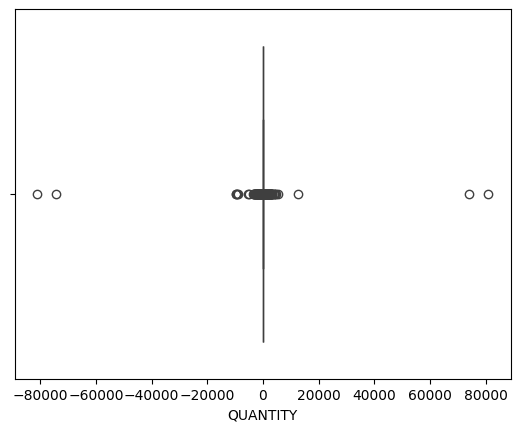

In [11]:
sns.boxplot(x=df['QUANTITY'])

Empleando un diagrama de caja buscamos representar los valores de la columna 'QUANTITY' a través de sus cuartiles y observamos que existen bastantes datos atípicos.

<Axes: xlabel='UNIT_PRICE'>

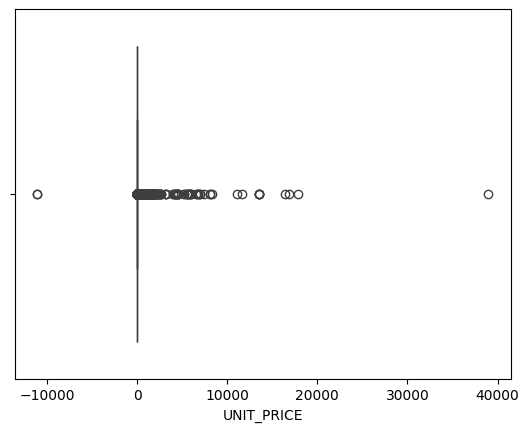

In [12]:
sns.boxplot(x=df['UNIT_PRICE'])

Empleando un diagrama de caja buscamos representar los valores de la columna 'UNIT_PRICE' a través de sus cuartiles y observamos que existen bastantes datos atípicos.

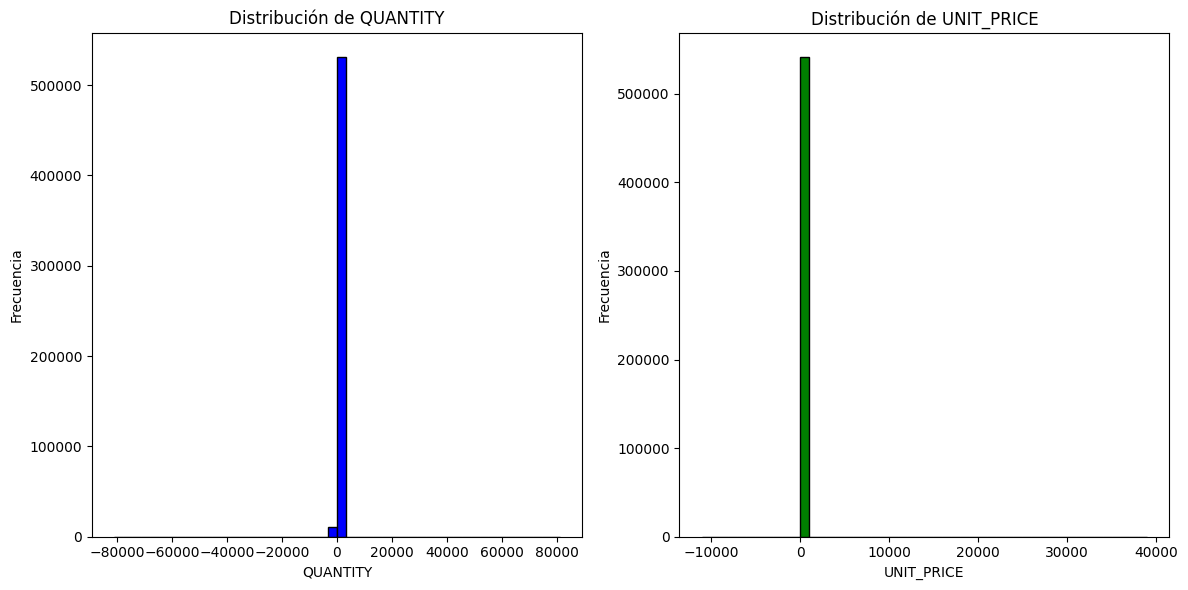

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['QUANTITY'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de QUANTITY')
plt.xlabel('QUANTITY')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UNIT_PRICE'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de UNIT_PRICE')
plt.xlabel('UNIT_PRICE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Usando histogramas representamos la distribución de los valores y notamos que la inmensa mayoria se encuentra dentro de un rango.

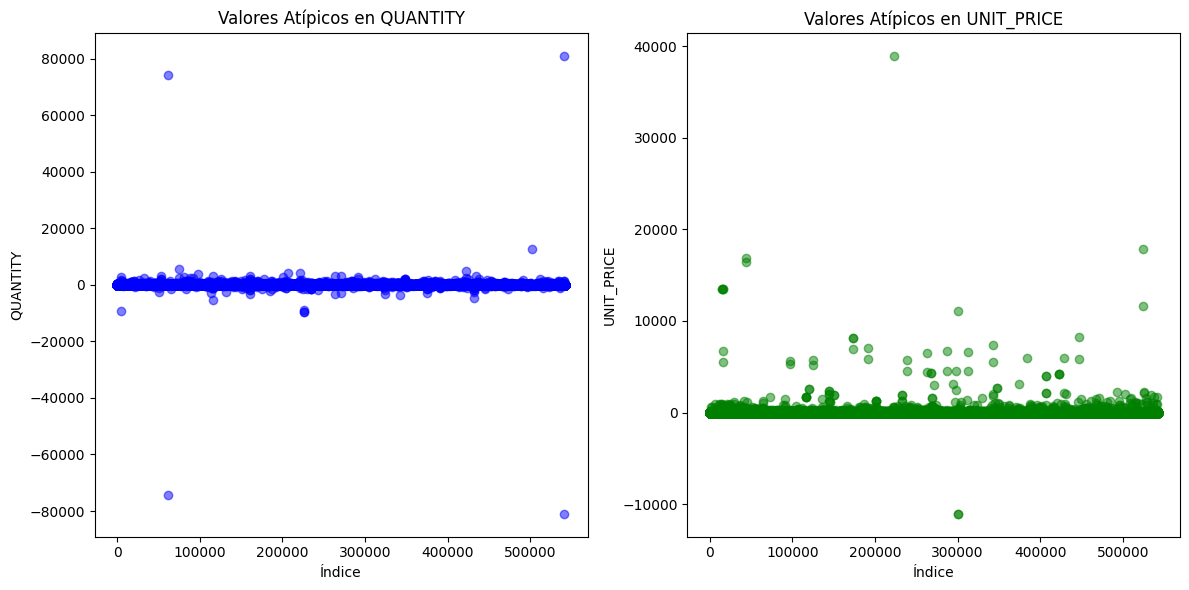

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['QUANTITY'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en QUANTITY')
plt.xlabel('Índice')
plt.ylabel('QUANTITY')

plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['UNIT_PRICE'], alpha=0.5, color='green')
plt.title('Valores Atípicos en UNIT_PRICE')
plt.xlabel('Índice')
plt.ylabel('UNIT_PRICE')

plt.tight_layout()
plt.show()

Con un diagrama de dispersión visualizamos los valores atípicos de forma más especifica. 

## Tratamiendo de valores ausentes.
---
Mediante el método isna() encontramos una gran cantidad de valores ausentes en las columnas 'DESCRIPTION' y 'CUSTOMER_ID' lo cual podría afectar nuestros resultados del analisis, así que utilizando diferentes métodos estos fueron rellenados. 


In [15]:
#Antes 
df.isna().sum()

INVOICE_NO           0
STOCK_CODE           0
DESCRIPTION       1454
QUANTITY             0
INVOICE_DATE         0
UNIT_PRICE           0
CUSTOMER_ID     135080
REGION               0
dtype: int64

In [16]:
df['DESCRIPTION'] = df['DESCRIPTION'].replace('?', 'unknown')

In [17]:
df['DESCRIPTION'].fillna('unknown', inplace=True)

In [18]:
df[df['DESCRIPTION']=='unknown']

INVOICE_NO STOCK_CODE DESCRIPTION  QUANTITY        INVOICE_DATE  \
622        536414      22139     unknown        56 2019-12-01 11:52:00   
1970       536545      21134     unknown         1 2019-12-01 14:32:00   
1971       536546      22145     unknown         1 2019-12-01 14:33:00   
1972       536547      37509     unknown         1 2019-12-01 14:33:00   
1987       536549     85226A     unknown         1 2019-12-01 14:34:00   
...           ...        ...         ...       ...                 ...   
535322     581199      84581     unknown        -2 2020-12-07 18:26:00   
535326     581203      23406     unknown        15 2020-12-07 18:31:00   
535332     581209      21620     unknown         6 2020-12-07 18:35:00   
536981     581234      72817     unknown        27 2020-12-08 10:33:00   
538554     581408      85175     unknown        20 2020-12-08 14:06:00   

        UNIT_PRICE CUSTOMER_ID          REGION  
622            0.0         NaN  United Kingdom  
1970           0.0         NaN  United Kingdom  
1971           0.0         NaN  United Kingdom  
1972           0.0         NaN  United Kingdom  
1987           0.0         NaN  United Kingdom  
...            ...         ...             ...  
535322         0.0         NaN  United Kingdom  
535326         0.0         NaN  United Kingdom  
535332         0.0         NaN  United Kingdom  
536981         0.0         NaN  United Kingdom  
538554         0.0         NaN  United Kingdom  

[1501 rows x 8 columns]

In [19]:
100*df[df['DESCRIPTION']=='unknown']['INVOICE_NO'].count()/df.shape[0]

0.2769837740284808

In [20]:
df.drop(df[df['DESCRIPTION']=='unknown'].index,axis=0,inplace=True)

Después de encontrar los valores ausentes, reemplazamos '?' de la columna 'DESCRIPTION' por la palabra 'unknown' y rellenamos espacios vacíos con la misma, para luego sacar el porcentaje de los datos 'unknown' y llegar a la conclusión de que mejor era eliminarlos. 

In [21]:
df[df['CUSTOMER_ID'].isna()]

INVOICE_NO STOCK_CODE                      DESCRIPTION  QUANTITY  \
1443       536544      21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444       536544      21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445       536544      21786               POLKADOT RAIN HAT          4   
1446       536544      21787            RAIN PONCHO RETROSPOT         2   
1447       536544      21790               VINTAGE SNAP CARDS         9   
...           ...        ...                              ...       ...   
541536     581498     85099B          JUMBO BAG RED RETROSPOT         5   
541537     581498     85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538     581498      85150    LADIES & GENTLEMEN METAL SIGN         1   
541539     581498      85174                S/4 CACTI CANDLES         1   
541540     581498        DOT                   DOTCOM POSTAGE         1   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  
1443   2019-12-01 14:32:00        2.51         NaN  United Kingdom  
1444   2019-12-01 14:32:00        2.51         NaN  United Kingdom  
1445   2019-12-01 14:32:00        0.85         NaN  United Kingdom  
1446   2019-12-01 14:32:00        1.66         NaN  United Kingdom  
1447   2019-12-01 14:32:00        1.66         NaN  United Kingdom  
...                    ...         ...         ...             ...  
541536 2020-12-09 10:26:00        4.13         NaN  United Kingdom  
541537 2020-12-09 10:26:00        4.13         NaN  United Kingdom  
541538 2020-12-09 10:26:00        4.96         NaN  United Kingdom  
541539 2020-12-09 10:26:00       10.79         NaN  United Kingdom  
541540 2020-12-09 10:26:00     1714.17         NaN  United Kingdom  

[133579 rows x 8 columns]

In [22]:
100*df['CUSTOMER_ID'].isna().sum()/df.shape[0]

24.71817589672988

In [23]:

df['CUSTOMER_ID'].fillna(0, inplace=True)

In [24]:
#Después 
df.isna().sum()

INVOICE_NO      0
STOCK_CODE      0
DESCRIPTION     0
QUANTITY        0
INVOICE_DATE    0
UNIT_PRICE      0
CUSTOMER_ID     0
REGION          0
dtype: int64

Posteriormente, buscamos el porcentaje de datos ausentes de la columna 'CUSTOMER_ID' y de acuerdo al resultado nos percatamos que no era adecuado eliminarlos. Seguido los valores ausentes fueron reemplazados por 0.

## Tratamiento de duplicados.
---
Con el método drop_duplicates() borramos las filas duplicadas del dataset. 

In [25]:
df = df.drop_duplicates().reset_index(drop=True)

In [26]:
df.duplicated().sum()

0

### Quantity
---
Filtramos los valores de la columna 'QUANTITY' para encontrar los datos menores a -2000.

In [27]:
df[df['QUANTITY'] < -2000]

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
4216      C536757      84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
50161      540564      22617                  mouldy thrown away.     -2600   
60844     C541433      23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215   
112219     545990      84598                                check     -3000   
114433     546152     72140F                           throw away     -5368   
129826     547560      72732               thrown away-can't sell     -2472   
158057    C550456      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114   
182747     552733      23059                    Thrown away-rusty     -2376   
222766     556687      23003         Printing smudges/thrown away     -9058   
222767     556690      23005         printing smudges/thrown away     -9600   
222768     556691      23005         printing smudges/thrown away     -9600   
260766     560039      20713         wrongly marked. 23343 in box     -3100   
371215     569466      23270               incorrect stock entry.     -2880   
426346     573593    79323LP                Unsaleable destroyed.     -2618   
426347     573594     79323P                Unsaleable destroyed.     -2003   
426349     573596     79323W                Unsaleable destroyed.     -4830   
533660    C581484      23843           PAPER CRAFT  LITTLE BIRDIE    -80995   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
4216   2019-12-02 14:23:00        0.03      15838.0  United Kingdom  
50161  2020-01-10 10:36:00        0.00          0.0  United Kingdom  
60844  2020-01-18 10:17:00        1.04      12346.0  United Kingdom  
112219 2020-03-08 13:07:00        0.00          0.0  United Kingdom  
114433 2020-03-09 17:25:00        0.00          0.0  United Kingdom  
129826 2020-03-23 17:28:00        0.00          0.0  United Kingdom  
158057 2020-04-18 13:08:00        2.10      15749.0  United Kingdom  
182747 2020-05-11 10:48:00        0.00          0.0  United Kingdom  
222766 2020-06-14 10:36:00        0.00          0.0  United Kingdom  
222767 2020-06-14 10:37:00        0.00          0.0  United Kingdom  
222768 2020-06-14 10:37:00        0.00          0.0  United Kingdom  
260766 2020-07-14 14:27:00        0.00          0.0  United Kingdom  
371215 2020-10-04 11:42:00        0.00          0.0  United Kingdom  
426346 2020-10-31 15:16:00        0.00          0.0  United Kingdom  
426347 2020-10-31 15:16:00        0.00          0.0  United Kingdom  
426349 2020-10-31 15:17:00        0.00          0.0  United Kingdom  
533660 2020-12-09 09:27:00        2.08      16446.0  United Kingdom

In [28]:
100*df[df['QUANTITY'] <=0]['INVOICE_NO'].count()/df.shape[0]

1.8096199125462495

In [29]:
#Eliminamos los datos dado que el porcentage es menor
df.drop(df[df['QUANTITY'] <= 0]['QUANTITY'].index,axis=0,inplace=True)

Enseguida, averiguamos el porcentaje de los valores negativos en la columna 'QUANTITY', por lo cual decidimos descartar todos los números menores a 0.

In [30]:
df[df['QUANTITY'] > 3000]

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
52005      540815      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
60839      541431      23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
96207      544612      22053                EMPIRE DESIGN ROSETTE      3906   
158456     550461      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
203564     554868      22197                 SMALL POPCORN HOLDER      4300   
260767     560040      23343                  came coded as 20713      3100   
267686     560599      18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      3186   
416713     573008      84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   
495915     578841      84826       ASSTD DESIGN 3D PAPER STICKERS     12540   
533659     581483      23843           PAPER CRAFT  LITTLE BIRDIE     80995   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
52005  2020-01-11 12:55:00        2.10      15749.0  United Kingdom  
60839  2020-01-18 10:01:00        1.04      12346.0  United Kingdom  
96207  2020-02-22 10:43:00        0.82      18087.0  United Kingdom  
158456 2020-04-18 13:20:00        2.10      15749.0  United Kingdom  
203564 2020-05-27 10:52:00        0.72      13135.0  United Kingdom  
260767 2020-07-14 14:28:00        0.00          0.0  United Kingdom  
267686 2020-07-19 17:04:00        0.06      14609.0  United Kingdom  
416713 2020-10-27 12:26:00        0.21      12901.0  United Kingdom  
495915 2020-11-25 15:57:00        0.00      13256.0  United Kingdom  
533659 2020-12-09 09:15:00        2.08      16446.0  United Kingdom

### Unit Price
---
Filtramos los valores de la columna 'UNIT_PRICE' para encontrar los datos menores o igual 0.

In [31]:
df[df['UNIT_PRICE'] <= 0].sample(20)

INVOICE_NO STOCK_CODE                        DESCRIPTION  QUANTITY  \
310065     564530      21172                  PARTY METAL SIGN          1   
191139     553539      21559  STRAWBERRY LUNCH BOX WITH CUTLERY         1   
515702     580391      21868                             Amazon         1   
239484     558340      22627                MINT KITCHEN SCALES         1   
190805     553521      21889             WOODEN BOX OF DOMINOES         1   
103127     545176      22357           KINGS CHOICE BISCUIT TIN         3   
267142     560565      82583                                FBA       160   
364004     568946      22740                         adjustment        89   
30088      538877      22112         CHOCOLATE HOT WATER BOTTLE         1   
311152     564651      23270   SET OF 2 CERAMIC PAINTED HEARTS         96   
116497     546406     46000S       POLYESTER FILLER PAD 40x40cm        70   
190804     553521      22203             MILK PAN RED RETROSPOT         1   
263923     560283      23196      VINTAGE LEAF MAGNETIC NOTEPAD        12   
191163     553539      22430          ENAMEL WATERING CAN CREAM         2   
419355     573255     85135B                              check         3   
473158     577117      22149                              check        34   
14073      537534      20652         BLUE POLKADOT LUGGAGE TAG          1   
413787     572740      22687                         adjustment         1   
14032      537534      22625                 RED KITCHEN SCALES         1   
14061      537534      22359             GLASS JAR KINGS CHOICE         1   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
310065 2020-08-25 14:57:00         0.0          0.0  United Kingdom  
191139 2020-05-17 15:27:00         0.0          0.0  United Kingdom  
515702 2020-12-04 10:42:00         0.0          0.0  United Kingdom  
239484 2020-06-28 14:01:00         0.0          0.0  United Kingdom  
190805 2020-05-17 14:35:00         0.0          0.0  United Kingdom  
103127 2020-02-28 14:19:00         0.0          0.0  United Kingdom  
267142 2020-07-19 13:44:00         0.0          0.0  United Kingdom  
364004 2020-09-29 15:01:00         0.0          0.0  United Kingdom  
30088  2019-12-14 15:29:00         0.0          0.0  United Kingdom  
311152 2020-08-26 14:19:00         0.0      14646.0     Netherlands  
116497 2020-03-11 16:21:00         0.0          0.0  United Kingdom  
190804 2020-05-17 14:35:00         0.0          0.0  United Kingdom  
263923 2020-07-18 08:32:00         0.0          0.0            EIRE  
191163 2020-05-17 15:27:00         0.0          0.0  United Kingdom  
419355 2020-10-28 12:18:00         0.0          0.0  United Kingdom  
473158 2020-11-17 18:04:00         0.0          0.0  United Kingdom  
14073  2019-12-07 11:48:00         0.0          0.0  United Kingdom  
413787 2020-10-25 15:45:00         0.0          0.0  United Kingdom  
14032  2019-12-07 11:48:00         0.0          0.0  United Kingdom  
14061  2019-12-07 11:48:00         0.0          0.0  United Kingdom

In [32]:
100*df[df['UNIT_PRICE'] <= 0]['INVOICE_NO'].count()/df.shape[0]

0.109999695502573

In [33]:
#Dado que el porcentaje es bajo elimnamos estos datos
df.drop(df[df['UNIT_PRICE'] <= 0]['UNIT_PRICE'].index,axis=0,inplace=True)

Enseguida, averiguamos el porcentaje de los valores menores o igual a 0 en la columna 'UNIT_PRICE', por lo cual decidimos descartarlos.

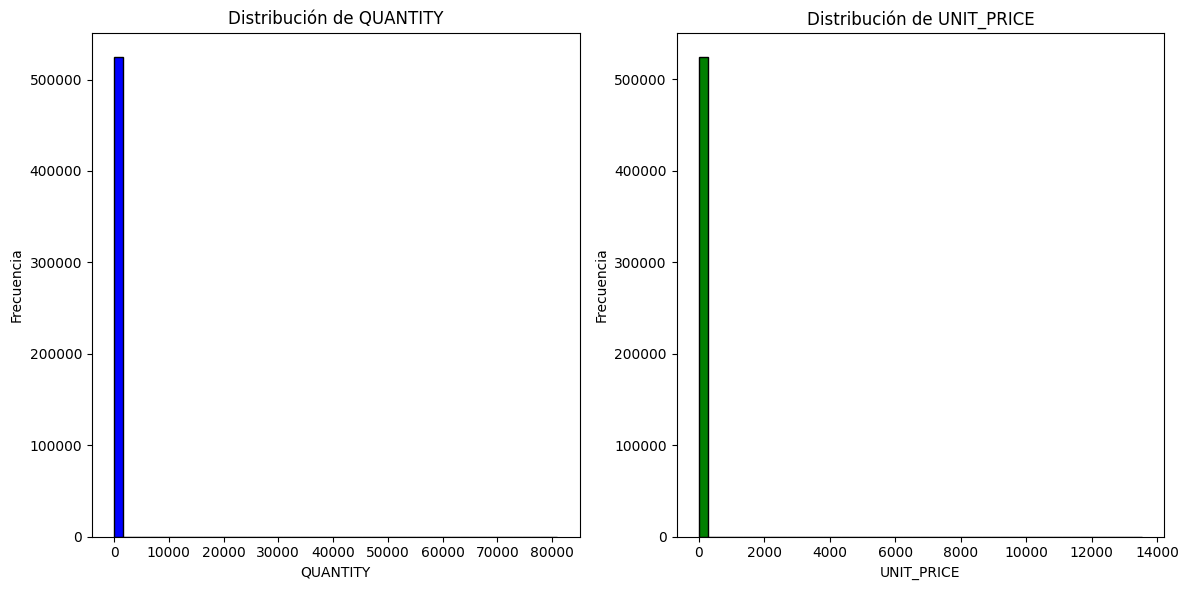

In [34]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['QUANTITY'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de QUANTITY')
plt.xlabel('QUANTITY')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UNIT_PRICE'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de UNIT_PRICE')
plt.xlabel('UNIT_PRICE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Comprobamos nuevamente con histogramas la ausencia de valores negativos. 

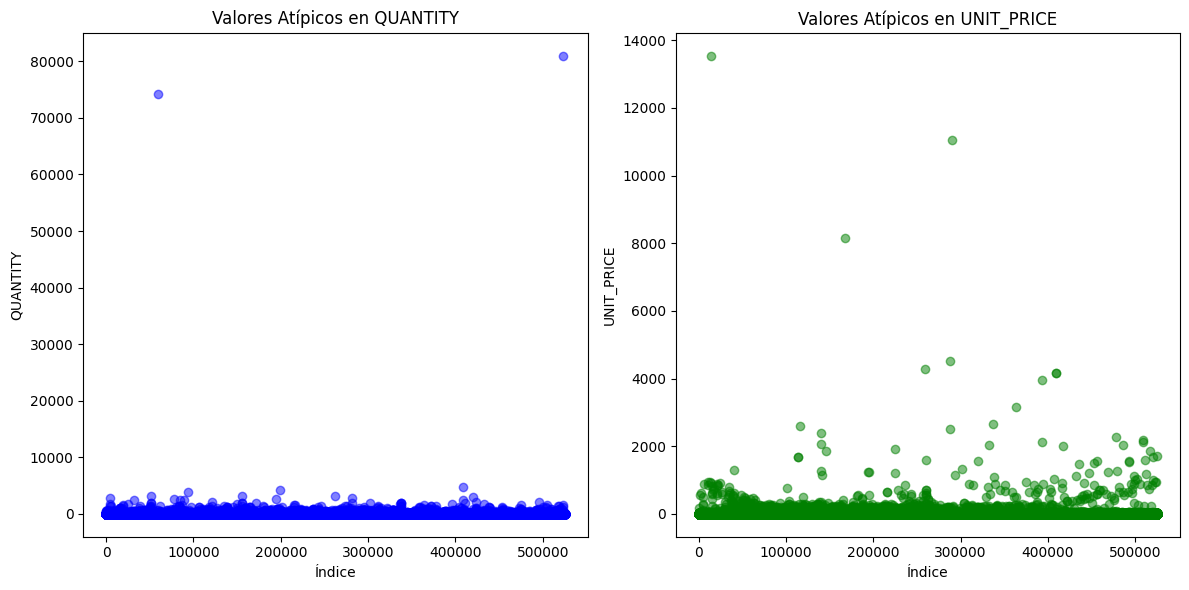

In [35]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['QUANTITY'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en QUANTITY')
plt.xlabel('Índice')
plt.ylabel('QUANTITY')

plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['UNIT_PRICE'], alpha=0.5, color='green')
plt.title('Valores Atípicos en UNIT_PRICE')
plt.xlabel('Índice')
plt.ylabel('UNIT_PRICE')

plt.tight_layout()
plt.show()

Con la ayuda de un diagrama de dispersión corroboramos que ya no existen valores atípicos. 

## Segmentacion por grupos.
---
Creamos nuevas columnas 'DAY', 'MONTH' y 'YEAR' para ser más especificos en las fechas. Adicionalmente, agregamos la columna 'TOTAL_REVENUE' para generar el total de las ganancias obtenidas por las compras.  

In [36]:
df['TOTAL_REVENUE'] = df['QUANTITY'] * df['UNIT_PRICE']

df['MONTH'] = df['INVOICE_DATE'].dt.month
df['YEAR'] = df['INVOICE_DATE'].dt.year
df['DAY'] = df['INVOICE_DATE'].dt.day_of_week

df.sample(10)

INVOICE_NO STOCK_CODE                         DESCRIPTION  QUANTITY  \
375929     569739      22121          NOEL WOODEN BLOCK LETTERS          3   
55202      541008      22699    ROSES REGENCY TEACUP AND SAUCER          6   
514008     580289      21907           I'M ON HOLIDAY METAL SIGN        12   
184848     552955      22502          PICNIC BASKET WICKER SMALL         4   
142149     548714      22697     GREEN REGENCY TEACUP AND SAUCER         1   
425792     573585      22835     HOT WATER BOTTLE I AM SO POORLY         3   
468884     576840     90039C  FIRE POLISHED GLASS BRACELET BLACK         1   
23170      538207      21179             NO JUNK MAIL METAL SIGN         1   
98442      544778      48185                  DOORMAT FAIRY CAKE         2   
316662     564974      22595            GINGHAM HEART DECORATION         2   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  \
375929 2020-10-06 10:48:00        5.95      14911.0            EIRE   
55202  2020-01-13 10:48:00        2.95      17848.0  United Kingdom   
514008 2020-12-02 13:32:00        2.10      15856.0  United Kingdom   
184848 2020-05-12 12:30:00        5.95      13113.0  United Kingdom   
142149 2020-04-03 15:07:00        2.95      17337.0  United Kingdom   
425792 2020-10-31 14:41:00       10.79          0.0  United Kingdom   
468884 2020-11-16 15:23:00        3.73          0.0  United Kingdom   
23170  2019-12-10 11:33:00        1.25      12748.0  United Kingdom   
98442  2020-02-23 12:03:00        7.95      14978.0  United Kingdom   
316662 2020-08-31 15:32:00        1.63          0.0  United Kingdom   

        TOTAL_REVENUE  MONTH  YEAR  DAY  
375929          17.85     10  2020    1  
55202           17.70      1  2020    0  
514008          25.20     12  2020    2  
184848          23.80      5  2020    1  
142149           2.95      4  2020    4  
425792          32.37     10  2020    5  
468884           3.73     11  2020    0  
23170            1.25     12  2019    1  
98442           15.90      2  2020    6  
316662           3.26      8  2020    0

# Métricas


##  Frequency. 
---

Esta métrica se puede construir contando el número de compras que un cliente ha hecho, puede ser por compra, o por producto, depende del enfoque que uno le 
quiera dar

---
<-TODO->Agregar la columna frequency para el clusterizado


In [37]:
top_10_products = df.groupby('DESCRIPTION')['QUANTITY'].sum().sort_values(ascending=False).head(10)
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='QUANTITY',barmode='group',title='Top 10 articulos mas vendidos',template='simple_white')
fig_coun.show()

Por medio de métodos de filtración y agrupación pudimos obtener el top 10 de los artículos más vendidos.

In [38]:
#Cambio de tipo de datos 
df['CUSTOMER_ID']=df['CUSTOMER_ID'].astype('int')
df['CUSTOMER_ID']=df['CUSTOMER_ID'].astype('str')

In [39]:
top_10_products = df.groupby(['CUSTOMER_ID'])['INVOICE_NO'].count().sort_values(ascending=False).head(10)
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='INVOICE_NO',barmode='group',title='Top 10 clientes', template= 'simple_white')
fig_coun.update_layout(xaxis_title='Fecha')
fig_coun.show()

Por medio de métodos de filtración y agrupación pudimos obtener el top 10 de los clientes con mayor fidelidad. 

### Frecuencia por orden de compra


In [40]:
df_freq=df[df['CUSTOMER_ID']!='0']

In [41]:
df_freq.sort_values('INVOICE_NO')

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
0          536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          536365      71053                  WHITE METAL LANTERN         6   
2          536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...        ...                                  ...       ...   
535127     581587      22555            PLASTERS IN TIN STRONGMAN        12   
535126     581587      22556       PLASTERS IN TIN CIRCUS PARADE         12   
535138     581587      23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
535131     581587      22730           ALARM CLOCK BAKELIKE IVORY         4   
535139     581587      22138        BAKING SET 9 PIECE RETROSPOT          3   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  \
0      2019-12-01 08:26:00        2.55       17850  United Kingdom   
1      2019-12-01 08:26:00        3.39       17850  United Kingdom   
2      2019-12-01 08:26:00        2.75       17850  United Kingdom   
3      2019-12-01 08:26:00        3.39       17850  United Kingdom   
4      2019-12-01 08:26:00        3.39       17850  United Kingdom   
...                    ...         ...         ...             ...   
535127 2020-12-09 12:50:00        1.65       12680          France   
535126 2020-12-09 12:50:00        1.65       12680          France   
535138 2020-12-09 12:50:00        4.15       12680          France   
535131 2020-12-09 12:50:00        3.75       12680          France   
535139 2020-12-09 12:50:00        4.95       12680          France   

        TOTAL_REVENUE  MONTH  YEAR  DAY  
0               15.30     12  2019    6  
1               20.34     12  2019    6  
2               22.00     12  2019    6  
3               20.34     12  2019    6  
4               20.34     12  2019    6  
...               ...    ...   ...  ...  
535127          19.80     12  2020    2  
535126          19.80     12  2020    2  
535138          16.60     12  2020    2  
535131          15.00     12  2020    2  
535139          14.85     12  2020    2  

[392692 rows x 12 columns]

In [42]:
df_frequency=df_freq.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_NO'].count()
fig = px.histogram(df_frequency, x="INVOICE_NO",template='simple_white', title='Distribución de facturas por cliente')
fig.show()

Distribución de facturas por clientes que tienen asignado un número ID.

In [43]:
df_frequency = df_frequency.rename(columns={'INVOICE_NO': 'FREQUENCY'})

In [44]:
df=df.merge(df_frequency,on='CUSTOMER_ID')


##  Monetary. 
---
Esta métrica es la más sencilla, representa simplemente el monto en dinero invertido por el cliente comprando un producto.

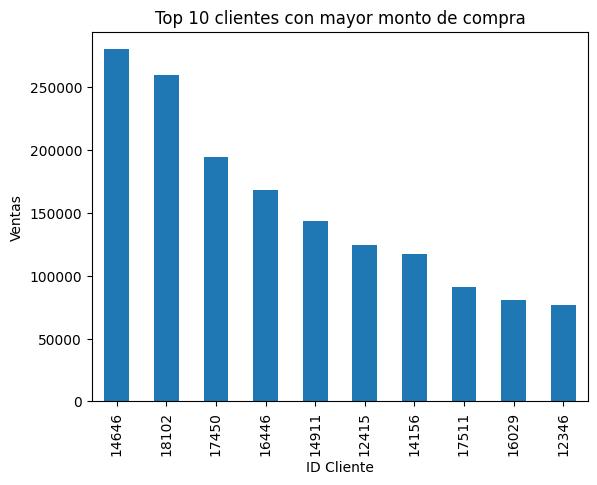

In [45]:
#CLIENTES QUE MAYOR GANANCIA DEJAN
top_10_products = df.groupby('CUSTOMER_ID')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="CUSTOMER_ID",title="Top 10 clientes con mayor monto de compra",ylabel="Ventas",xlabel="ID Cliente")
plt.show()

In [46]:
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='TOTAL_REVENUE',barmode='group',title='Top 10 clientes con mayor monto de compra',template='simple_white')
fig_coun.show()

### Histograma de ganancias

In [47]:
df_mon=df[df['CUSTOMER_ID']!='0']

In [48]:
df_monetary=df_mon.groupby(['CUSTOMER_ID'],as_index=False)['TOTAL_REVENUE'].sum()
fig = px.histogram(df_monetary, x="TOTAL_REVENUE",template='simple_white')
fig.show()

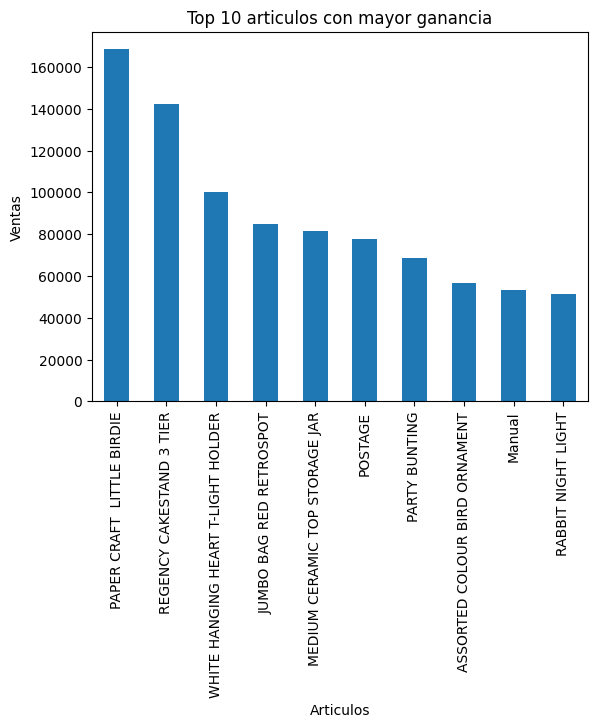

In [49]:
#ARTICULOS CON MAYOR GANANCIA
top_10_products = df.groupby('DESCRIPTION')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="DESCRIPTION",title="Top 10 articulos con mayor ganancia",ylabel="Ventas",xlabel="Articulos")
plt.show()

In [50]:
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='TOTAL_REVENUE',barmode='group',title='Top 10 articulos con mayor ganancia',template='simple_white')
fig_coun.show()

## Recency. 
---
Esta métrica se puede construir tomando como base el día actual y a este restar los días hasta la última fecha de compra del cliente, puede ser días, semanas, años, esto depende del tipo de industria y la frecuencia promedio de compra (las personas no compran un auto nuevo cada 2 semanas, o tal vez sí, pero no las conocemos). Así que puedes usar la última fecha de compra del conjunto de datos como parámetro para estimar la diferencia de días del resto de compras.

In [51]:
df_dates = df.sort_values('INVOICE_DATE')

df_dates.head()

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE  \
0 2019-12-01 08:26:00        2.55       17850  United Kingdom          15.30   
1 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2 2019-12-01 08:26:00        2.75       17850  United Kingdom          22.00   
3 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
4 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   

   MONTH  YEAR  DAY  FREQUENCY  
0     12  2019    6        297  
1     12  2019    6        297  
2     12  2019    6        297  
3     12  2019    6        297  
4     12  2019    6        297

In [52]:
orders_per_month= df_dates.groupby('MONTH').agg({'CUSTOMER_ID':'nunique','TOTAL_REVENUE':'sum'})

orders_per_month['Orders_per_user'] = orders_per_month['TOTAL_REVENUE']/ orders_per_month['CUSTOMER_ID'] 
orders_per_month.sort_index(ascending=False,inplace=True)
print(orders_per_month.head(12))
print()
mean_orders= orders_per_month['Orders_per_user'].mean()
print('Promedio de compra por mes:',mean_orders)


       CUSTOMER_ID  TOTAL_REVENUE  Orders_per_user
MONTH                                             
12            1265    1087613.170       859.773257
11            1664    1156205.610       694.835102
10            1364    1035642.450       759.268658
9             1266     950690.202       750.940128
8              935     644051.040       688.824642
7              949     598962.901       631.151634
6              991     660046.050       666.040414
5             1056     677355.150       641.434801
4              856     468374.331       547.166275
3              974     594081.760       609.940205
2              758     446084.920       588.502533
1              741     568101.310       766.668435

Promedio de compra por mes: 683.7121736436939


In [53]:
fig_coun=px.bar(orders_per_month,x=orders_per_month.index,y='TOTAL_REVENUE',barmode='group',title='Ganancias por mes',template='simple_white')
fig_coun.show()

In [54]:
fig = px.histogram(orders_per_month, x="Orders_per_user",template='simple_white')
fig.show()

### Dias sin comprar

In [55]:
df_recency=df.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_DATE'].max()
df_recency['RECENCY']=(datetime.now()-df_recency['INVOICE_DATE']).dt.days
df_recency

CUSTOMER_ID        INVOICE_DATE  RECENCY
0          12346 2020-01-18 10:01:00     1628
1          12347 2020-12-07 15:52:00     1304
2          12348 2020-09-25 13:13:00     1377
3          12349 2020-11-21 09:51:00     1320
4          12350 2020-02-02 16:01:00     1613
...          ...                 ...      ...
4333       18280 2020-03-07 09:52:00     1579
4334       18281 2020-06-12 10:53:00     1482
4335       18282 2020-12-02 11:43:00     1309
4336       18283 2020-12-06 12:02:00     1305
4337       18287 2020-10-28 09:29:00     1344

[4338 rows x 3 columns]

In [56]:
df=df.merge(df_recency,on='CUSTOMER_ID')

In [57]:
df.drop(['INVOICE_DATE_y'],axis=1,inplace=True)

In [58]:
df

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
0          536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          536365      71053                  WHITE METAL LANTERN         6   
2          536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...        ...                                  ...       ...   
392687     581578      22993         SET OF 4 PANTRY JELLY MOULDS        12   
392688     581578      22907     PACK OF 20 NAPKINS PANTRY DESIGN        12   
392689     581578      22908        PACK OF 20 NAPKINS RED APPLES        12   
392690     581578      23215     JINGLE BELL HEART ANTIQUE SILVER        12   
392691     581578      22736          RIBBON REEL MAKING SNOWMEN         10   

            INVOICE_DATE_x  UNIT_PRICE CUSTOMER_ID          REGION  \
0      2019-12-01 08:26:00        2.55       17850  United Kingdom   
1      2019-12-01 08:26:00        3.39       17850  United Kingdom   
2      2019-12-01 08:26:00        2.75       17850  United Kingdom   
3      2019-12-01 08:26:00        3.39       17850  United Kingdom   
4      2019-12-01 08:26:00        3.39       17850  United Kingdom   
...                    ...         ...         ...             ...   
392687 2020-12-09 12:16:00        1.25       12713         Germany   
392688 2020-12-09 12:16:00        0.85       12713         Germany   
392689 2020-12-09 12:16:00        0.85       12713         Germany   
392690 2020-12-09 12:16:00        2.08       12713         Germany   
392691 2020-12-09 12:16:00        1.65       12713         Germany   

        TOTAL_REVENUE  MONTH  YEAR  DAY  FREQUENCY  RECENCY  
0               15.30     12  2019    6        297     1675  
1               20.34     12  2019    6        297     1675  
2               22.00     12  2019    6        297     1675  
3               20.34     12  2019    6        297     1675  
4               20.34     12  2019    6        297     1675  
...               ...    ...   ...  ...        ...      ...  
392687          15.00     12  2020    2         38     1302  
392688          10.20     12  2020    2         38     1302  
392689          10.20     12  2020    2         38     1302  
392690          24.96     12  2020    2         38     1302  
392691          16.50     12  2020    2         38     1302  

[392692 rows x 14 columns]

In [59]:
df_recency_merged=df[df['CUSTOMER_ID']!='0']

In [60]:
fig = px.histogram(df_recency_merged, x="RECENCY",template='simple_white')
fig.show()

## ¿Cúal es el país donde más se vende?

In [61]:
df_country=df.groupby(['REGION'],as_index=False)['TOTAL_REVENUE'].sum().sort_values(by='TOTAL_REVENUE',ascending=False)
top_10_country=df_country.head(10)
fig_coun=px.bar(top_10_country,x='REGION',y='TOTAL_REVENUE',barmode='group',title='Ventas por país',template='simple_white')
fig_coun.show()

In [62]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='world'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

In [63]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='europe'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

In [64]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='north america'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

In [65]:
fig = px.choropleth(
    top_10_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='europe'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

## Ventas en función del tiempo

## ¿En que mes se vende más?

In [66]:
df_dates=df.copy()
df_dates.set_index('INVOICE_DATE_x',inplace=True)
df_dates.sort_index(inplace=True)
df_dates.head(10)

INVOICE_NO STOCK_CODE  \
INVOICE_DATE_x                              
2019-12-01 08:26:00     536365     85123A   
2019-12-01 08:26:00     536365      71053   
2019-12-01 08:26:00     536365     84406B   
2019-12-01 08:26:00     536365     84029G   
2019-12-01 08:26:00     536365     84029E   
2019-12-01 08:26:00     536365      22752   
2019-12-01 08:26:00     536365      21730   
2019-12-01 08:28:00     536366      22633   
2019-12-01 08:28:00     536366      22632   
2019-12-01 08:34:00     536368      22912   

                                             DESCRIPTION  QUANTITY  \
INVOICE_DATE_x                                                       
2019-12-01 08:26:00   WHITE HANGING HEART T-LIGHT HOLDER         6   
2019-12-01 08:26:00                  WHITE METAL LANTERN         6   
2019-12-01 08:26:00       CREAM CUPID HEARTS COAT HANGER         8   
2019-12-01 08:26:00  KNITTED UNION FLAG HOT WATER BOTTLE         6   
2019-12-01 08:26:00       RED WOOLLY HOTTIE WHITE HEART.         6   
2019-12-01 08:26:00         SET 7 BABUSHKA NESTING BOXES         2   
2019-12-01 08:26:00    GLASS STAR FROSTED T-LIGHT HOLDER         6   
2019-12-01 08:28:00               HAND WARMER UNION JACK         6   
2019-12-01 08:28:00            HAND WARMER RED POLKA DOT         6   
2019-12-01 08:34:00       YELLOW COAT RACK PARIS FASHION         3   

                     UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE  \
INVOICE_DATE_x                                                               
2019-12-01 08:26:00        2.55       17850  United Kingdom          15.30   
2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2019-12-01 08:26:00        2.75       17850  United Kingdom          22.00   
2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2019-12-01 08:26:00        7.65       17850  United Kingdom          15.30   
2019-12-01 08:26:00        4.25       17850  United Kingdom          25.50   
2019-12-01 08:28:00        1.85       17850  United Kingdom          11.10   
2019-12-01 08:28:00        1.85       17850  United Kingdom          11.10   
2019-12-01 08:34:00        4.95       13047  United Kingdom          14.85   

                     MONTH  YEAR  DAY  FREQUENCY  RECENCY  
INVOICE_DATE_x                                             
2019-12-01 08:26:00     12  2019    6        297     1675  
2019-12-01 08:26:00     12  2019    6        297     1675  
2019-12-01 08:26:00     12  2019    6        297     1675  
2019-12-01 08:26:00     12  2019    6        297     1675  
2019-12-01 08:26:00     12  2019    6        297     1675  
2019-12-01 08:26:00     12  2019    6        297     1675  
2019-12-01 08:26:00     12  2019    6        297     1675  
2019-12-01 08:28:00     12  2019    6        297     1675  
2019-12-01 08:28:00     12  2019    6        297     1675  
2019-12-01 08:34:00     12  2019    6        172     1333

In [67]:
df_series=df_dates['TOTAL_REVENUE']
df_series=df_series.resample('1M').sum()

In [68]:
fig = px.line(df_series, markers=True,title='Serie de ventas',template='simple_white')
fig.show()

## ¿En que mes se vende más cantidad de productos?

In [69]:
df_series_q=df_dates['QUANTITY']
df_series_q=df_series_q.resample('1M').sum()

In [70]:
fig_1 = px.line(df_series_q, markers=True,title='Serie de numero ventas',template='simple_white')
fig_1.show()


## Segmentacion por clusteres.
<-TODO-> Realizar los clusteres con 3 variables RFM 

In [71]:
data_positive_quantity = df.copy()

# Agrupar por 'CUSTOMER_ID' y calcular el gasto total y la cantidad total comprada
customer_data = data_positive_quantity.groupby('CUSTOMER_ID').agg(
    TOTAL_REVENUE=pd.NamedAgg(column='TOTAL_REVENUE', aggfunc='sum'),
    FREQUENCY=pd.NamedAgg(column='FREQUENCY', aggfunc='unique'),
    RECENCY=pd.NamedAgg(column='RECENCY', aggfunc='unique')).reset_index()

# Mostrar los primeros registros del DataFrame para verificar
print(customer_data.head())

  CUSTOMER_ID  TOTAL_REVENUE FREQUENCY RECENCY
0       12346       77183.60       [1]  [1628]
1       12347        4310.00     [182]  [1304]
2       12348        1797.24      [31]  [1377]
3       12349        1757.55      [73]  [1320]
4       12350         334.40      [17]  [1613]


In [98]:
data_positive_quantity = df.copy()

# Agrupar por 'CUSTOMER_ID' y calcular el gasto total y la cantidad total comprada
customer_data = data_positive_quantity.groupby('CUSTOMER_ID').agg({'TOTAL_REVENUE':'sum',
                                                                   'FREQUENCY':'unique',
                                                                   'RECENCY':'unique'}).reset_index()

# Mostrar los primeros registros del DataFrame para verificar
print(customer_data.head())

  CUSTOMER_ID  TOTAL_REVENUE FREQUENCY RECENCY
0       12346       77183.60       [1]  [1628]
1       12347        4310.00     [182]  [1304]
2       12348        1797.24      [31]  [1377]
3       12349        1757.55      [73]  [1320]
4       12350         334.40      [17]  [1613]


In [99]:
customer_data_copy=customer_data.copy()

In [101]:
customer_data_copy['FREQUENCY']=customer_data_copy['FREQUENCY'].astype('str')
customer_data_copy['RECENCY']=customer_data_copy['RECENCY'].astype('str')

In [114]:
customer_data_copy['FREQUENCY'] = customer_data_copy['FREQUENCY'].str.replace('[', '').str.replace(']', '')
customer_data_copy['RECENCY'] = customer_data_copy['RECENCY'].str.replace('[', '').str.replace(']', '')

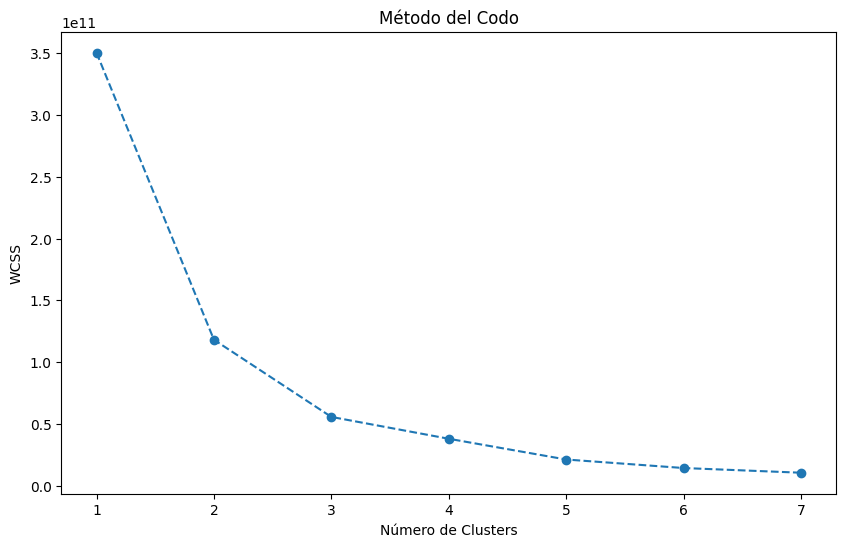

In [107]:
# Seleccionar las características para la segmentación
features = customer_data_copy[['TOTAL_REVENUE', 'FREQUENCY','RECENCY']]

## Estandarizar los datos
#scaler = StandardScaler()
#features_scaled = scaler.fit_transform(features)

# Determinar el número óptimo de clusters utilizando el método del codo con un rango reducido
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo con el rango reducido
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [74]:
## Seleccionar las características para la segmentación
#features = df[['TOTAL_REVENUE', 'FREQUENCY','RECENCY']]
#
## Estandarizar los datos
#scaler = StandardScaler()
#features_scaled = scaler.fit_transform(features)
#
## Determinar el número óptimo de clusters utilizando el método del codo con un rango reducido
#wcss = []
#for i in range(1, 8):
#    kmeans = KMeans(n_clusters=i, random_state=42)
#    kmeans.fit(features_scaled)
#    wcss.append(kmeans.inertia_)
#
## Graficar el método del codo con el rango reducido
#plt.figure(figsize=(10, 6))
#plt.plot(range(1, 8), wcss, marker='o', linestyle='--')
#plt.title('Método del Codo')
#plt.xlabel('Número de Clusters')
#plt.ylabel('WCSS')
#plt.show()

In [108]:
# Aplicar K-means con 3 clusters a la muestra de datos
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features)

## Visualizar los resultados
#plt.figure(figsize=(10, 6))
#plt.scatter(features['TOTAL_REVENUE'], features['TOTAL_QUANTITY'], c=features['CLUSTER'], cmap='viridis')
#plt.title('Segmentación de Clientes (Muestra)')
#plt.xlabel('Gasto Total')
#plt.ylabel('Cantidad Total Comprada')
#plt.show()

KMeans(n_clusters=4, random_state=42)

In [105]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['TOTAL_REVENUE','FREQUENCY','RECENCY'])
centroids

TOTAL_REVENUE    FREQUENCY      RECENCY
0    1161.206167    74.078263  1396.660702
1  209287.556000  1703.200000  1304.000000
2   65569.330526  1265.789474  1348.263158
3   14051.534878   403.772358  1318.463415

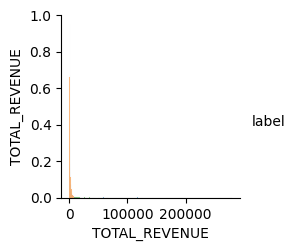

In [111]:
# Añade una columna con el número de clúster
customer_data_copy['label'] = kmeans.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid','3_centroid']
## Se necesitará reconfigurar el índice más tarde
data_all = pd.concat([customer_data_copy, centroids], ignore_index=True)
#
## Traza el gráfico
sns.pairplot(customer_data_copy, hue='label', diag_kind='hist')

In [116]:
print('HOLA MUNDO')

HOLA MUNDO


# Reporte de resultados